## Новое
> Задачи
    
    1. (20-40 мин)
    Залить в папку data word2vec https://github.com/mmihaltz/word2vec-GoogleNews-vectors
    Залить в папку data glove
    Залить в папку data doc2vec?

    1.5 (30мин-2 ч)
    Добавить в папку dirty_dumps результаты fasttext в формате *

    2.  (10мин-1ч)
    После посчитать все метрики, отрисовать графики (запустить код)
    
    3.  (2-6 ч)
    Отрисовать pyLDA https://github.com/bmabey/pyLDAvis  результаты метрики добавить в финальную табличку
    
    4. Написать отчет (1-2 ч)
    

(старое)
> ToDo list

- Добавить embeding word2vec (wiki)     
                                             (Все модели залить в папку data)
- Добавить embeding glov
                                             (Попробовать PyLDA)
- Добавить embeding LDA


- Протестировать что все работает


- Добавить результаты fasttext в папку dump     
                                            (результаты в оговоренном формате и с правильными названиями залить в папку dump)
- Отрисовать все, используя функцию show_metric


- Визуализировать весторное представление (Pasha)
- Визуализировать используя PyLDA (https://github.com/bmabey/pyLDAvis)


- Написать отчет (Nastya)

<center><h5>Авторы работы: Адаменко, Шведов, Пестова</h5></center>

    Векторные представления слов, тематическое моделирование, классификация текстов.
    Дедлайн: 25.10.2018 + 7 дней (update)
    
    Результатом выполнения задания является ipython-ноутбук, в котором представ- лены все скрипты, реализующие проделанные эксперименты и отчет, описывающий каждый шаг и всю логику вычислений и все полученные результаты. Отчёт также должен содержать краткое описание всех использованных моделей (с указанием на цитируемый источник описания модели, если такой имеется) и инструментов. Вся проделанная работа должна быть понятна из этого текста.
    
    На усмотрение проверяющего остается штраф (т.е. снижение оценки) за неакку- ратное оформление, копирование Википедии и любого другого ресурса без указания источника, списывание, неформальный стиль изложения и обилие стилистических ошибок.
    
    Домашнее задание выполняется в группах по 1-3 человека.
    Все вопросы по содержанию, оформлению и сдаче домашнего задания можно задавать в чате курса HSE_Fintech_NLP.
    Выполненное домашнее задание сдается через систему AnyTask. Инструкции по использованию системы AnyTask будут дополнительно изложены в чате. Для начала выполнения работы они не требуются.

In [5]:
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter, defaultdict
%matplotlib inline

import sys

import pickle

Скачаем данные

In [54]:
gi

/home/autodeploy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [57]:
print(, df.shape)
df.head()

(19348, 2)


,label,text
0,14,"""convent intern commiss rhine bern convent le..."
1,17,"""exchang letter commiss intern bureau weight ..."
2,38,"""council decis juli conclus protocol access u..."
3,41,"""addit agreement agreement product clock watc..."
4,42,"""exchang letter india excel mr swaminathan am..."


In [69]:
del y[2], t[2]

In [64]:
print(y.shape, 'title : ', y['label'].nunique())
y.head()

(102741, 2) title :  19314


,title,label
0,environmental_protection,14
1,pollution_control_measures,14
2,environmental_cooperation,14
3,rhine_valley,14
4,ec_agreement,14


In [70]:
print(t.shape, '\ntitle: ', t['title'].nunique(), '\ttext: ', t['text'].nunique())
t.head()

(102741, 3) 
title:  3956 	text:  19281


,label,text,title
0,14,"""convent intern commiss rhine bern convent le...",environmental_protection
1,14,"""convent intern commiss rhine bern convent le...",pollution_control_measures
2,14,"""convent intern commiss rhine bern convent le...",environmental_cooperation
3,14,"""convent intern commiss rhine bern convent le...",rhine_valley
4,14,"""convent intern commiss rhine bern convent le...",ec_agreement


У нас есть 19281 текст
и 3956 уникальных классов

In [71]:
d = pickle.load(open('/mnt/dump/dirty_dump/count vectorizer|logistic regression|0', 'rb'))
d['p_train'].shape

(3012, 3)

In [72]:
y['label'].nunique()

19314

In [73]:
y['title'].nunique()

3956

# Часть I (6 баллов) 

В этой части задания задания требуется решить задачу классификации текстовой коллекции EUR-lex, используя различные признаковые про- странства.
#### Формулировка задания:

### 1.1 
(1 балл) Предобработка данных. Требуется привести данные в подходящий для работы вид, применить знакомые вам средства предобработки. Все проделанные операции подробно описать в отчёте.

>Тут разные языки, определим их

In [74]:
from langdetect import detect
from tqdm import tqdm

In [75]:
df.shape

(19348, 2)

In [11]:
detect('спермбанк')

'mk'

In [76]:
df['lang'] = [detect(i) for i in tqdm(df['text'])]  # df['text'].apply(detect) # this does not show progress bar


  3%|▎         | 506/19348 [00:19<14:41, 21.37it/s]


  5%|▌         | 1057/19348 [00:38<10:25, 29.23it/s]


  8%|▊         | 1608/19348 [00:57<10:21, 28.56it/s]


 11%|█         | 2158/19348 [01:16<08:54, 32.15it/s]


 14%|█▍        | 2692/19348 [01:35<08:35, 32.30it/s]


 17%|█▋        | 3257/19348 [01:54<08:50, 30.35it/s]


 20%|█▉        | 3831/19348 [02:13<09:55, 26.05it/s]


 23%|██▎       | 4422/19348 [02:31<09:48, 25.38it/s]


 26%|██▌       | 5032/19348 [02:50<06:54, 34.50it/s]


 29%|██▉       | 5638/19348 [03:09<07:04, 32.30it/s]


 32%|███▏      | 6240/19348 [03:28<06:27, 33.80it/s]


 35%|███▌      | 6785/19348 [03:46<08:57, 23.38it/s]


 38%|███▊      | 7339/19348 [04:05<08:00, 25.02it/s]


 40%|████      | 7823/19348 [04:25<08:48, 21.79it/s]


 43%|████▎     | 8346/19348 [04:44<06:08, 29.86it/s]


 46%|████▌     | 8907/19348 [05:02<06:26, 27.00it/s]


 49%|████▉     | 9470/19348 [05:21<06:06, 26.97it/s]


 52%|█████▏    | 10027/19348 [05:40<05:18, 29.22it/s]


 55%|█████▍    | 10559/19348 [05:59<05:04, 28.84it/s]


 57%|█████▋    | 11079/19348 [06:17<04:53, 28.21it/s]


 60%|██████    | 11621/19348 [06:36<04:05, 31.49it/s]


 63%|██████▎   | 12134/19348 [06:54<04:03, 29.66it/s]


 66%|██████▌   | 12673/19348 [07:13<04:39, 23.86it/s]


 68%|██████▊   | 13162/19348 [07:31<03:53, 26.46it/s]


 71%|███████   | 13677/19348 [07:50<02:55, 32.26it/s]


 73%|███████▎  | 14161/19348 [08:09<03:25, 25.25it/s]


 76%|███████▌  | 14689/19348 [08:28<02:51, 27.21it/s]


 79%|███████▊  | 15193/19348 [08:46<03:12, 21.54it/s]


 81%|████████  | 15710/19348 [09:05<02:11, 27.75it/s]


 84%|████████▍ | 16274/19348 [09:23<01:31, 33.67it/s]


 87%|████████▋ | 16786/19348 [09:42<01:16, 33.30it/s]


 90%|████████▉ | 17353/19348 [10:01<01:15, 26.25it/s]


 92%|█████████▏| 17893/19348 [10:19<00:52, 27.91it/s]


 95%|█████████▌| 18416/19348 [10:38<00:37, 24.66it/s]


 98%|█████████▊| 18915/19348 [10:56<00:16, 26.13it/s]


100%|██████████| 19348/19348 [11:10<00:00, 28.86it/s]

In [77]:
df.to_excel('/mnt/dump/data/df_1.xlsx')

In [78]:
# #If something fall run shis
# df = pd.read_excel('data/df_1.xlsx')

> Посмотрим на распределение языков в датасете

In [79]:
df.head()

,label,text,lang
0,14,"""convent intern commiss rhine bern convent le...",fr
1,17,"""exchang letter commiss intern bureau weight ...",en
2,38,"""council decis juli conclus protocol access u...",en
3,41,"""addit agreement agreement product clock watc...",en
4,42,"""exchang letter india excel mr swaminathan am...",en


In [80]:
import seaborn as sns

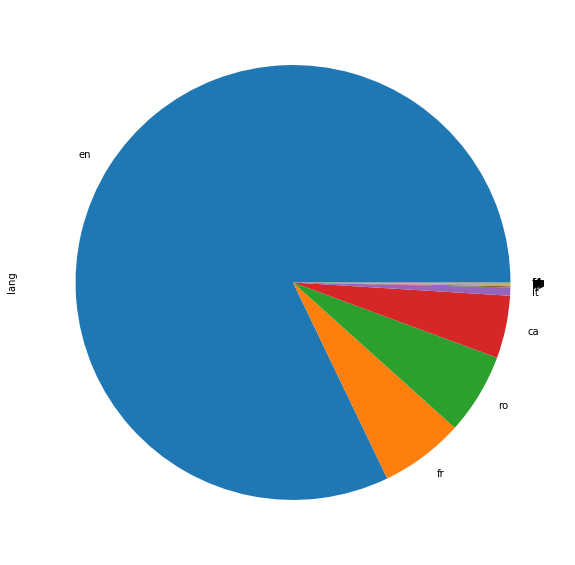

en    15891
fr     1204
ro     1165
ca      900
it      118
lt       17
nl       13
es       11
de        8
sv        4
da        3
pt        3
sl        2
hu        2
no        2
id        1
pl        1
sk        1
fi        1
el        1
Name: lang, dtype: int64

In [28]:
plt.figure(figsize = (10, 10))
df['lang'].value_counts().plot(kind = 'pie')
plt.show()
df['lang'].value_counts()

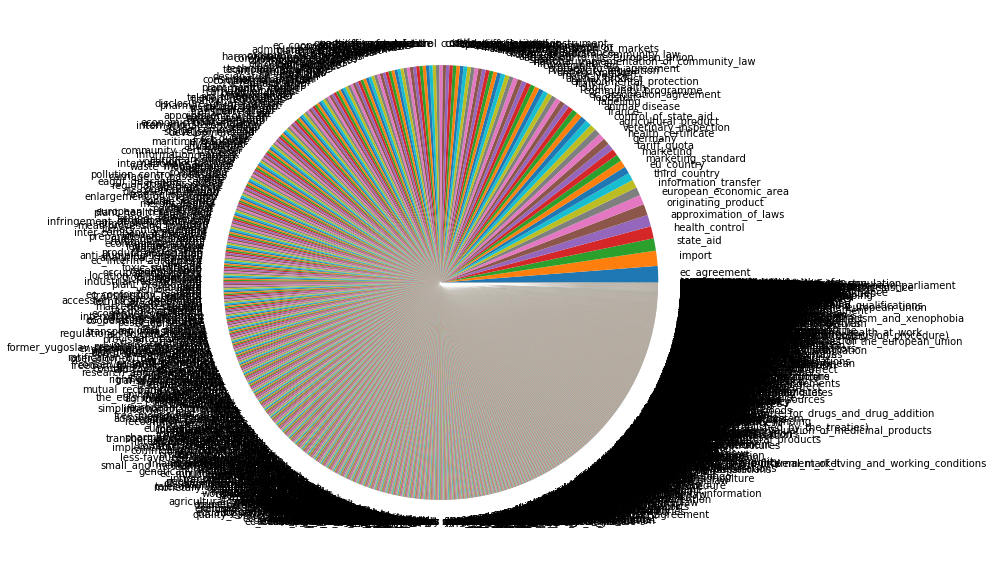

ec_agreement                        1253
import                              1156
state_aid                            939
health_control                       929
approximation_of_laws                886
originating_product                  859
european_economic_area               740
information_transfer                 637
third_country                        629
eu_country                           588
marketing_standard                   559
marketing                            556
tariff_quota                         529
germany                              516
health_certificate                   515
veterinary_inspection                514
agricultural_product                 494
control_of_state_aid                 479
france                               473
animal_disease                       470
labelling                            460
foodstuff                            430
ec_association_agreement             401
community_programme                  388
public_health   

In [31]:
plt.figure(figsize = (10, 10))
t['title'].value_counts().plot(kind = 'pie')
plt.show()
t['title'].value_counts()

> Предобработка данных:
    - Удалим спец символы
    - Удалим стоп-слова (разные для разных языков) 
    - Приведем все слова к основам. (не будем этого делать)

In [32]:
df.head()

,label,text
0,14,"""convent intern commiss rhine bern convent le..."
1,17,"""exchang letter commiss intern bureau weight ..."
2,38,"""council decis juli conclus protocol access u..."
3,41,"""addit agreement agreement product clock watc..."
4,42,"""exchang letter india excel mr swaminathan am..."


This lowercases, tokenizes, de-accents (optional)

In [81]:
df['text_preprocess'] = [' '.join(gensim.utils.simple_preprocess(i, deacc=True)) for i in tqdm(df['text'])]


 38%|███▊      | 7354/19348 [00:21<01:03, 187.72it/s]


 65%|██████▍   | 12496/19348 [00:41<00:31, 214.15it/s]


 92%|█████████▏| 17844/19348 [01:02<00:09, 154.34it/s]


100%|██████████| 19348/19348 [01:08<00:00, 281.63it/s]

In [82]:
df.head()

,label,text,lang,text_preprocess
0,14,"""convent intern commiss rhine bern convent le...",fr,convent intern commiss rhine bern convent le g...
1,17,"""exchang letter commiss intern bureau weight ...",en,exchang letter commiss intern bureau weight me...
2,38,"""council decis juli conclus protocol access u...",en,council decis juli conclus protocol access uni...
3,41,"""addit agreement agreement product clock watc...",en,addit agreement agreement product clock watch ...
4,42,"""exchang letter india excel mr swaminathan am...",en,exchang letter india excel mr swaminathan amba...


This remove stopwords

In [35]:
# !pip3 install stop-words

In [83]:
from stop_words import get_stop_words, StopWordError
get_stop_words('ru')
def remove_stop_words(text, lang):
    #If there are no languqge
    #if lang in ['no', 'lt', 'sl']:
    #    return text
    try:
        stop_words = get_stop_words(lang)
    except StopWordError:
        sys.stderr.write("no such lanquage: " + lang)
        return text
    
    for word in stop_words:
        text.replace(' '+word+' ', ' ')
    return text

df['text_preprocess_with_out_stop_words'] = [remove_stop_words(text, lang) for text, lang in 
                                             tqdm(df[['text_preprocess', 'lang']].get_values())]


 58%|█████▊    | 11132/19348 [00:18<00:16, 491.40it/s]


100%|██████████| 19348/19348 [00:34<00:00, 554.48it/s]

In [84]:
df.tail()

,label,text,lang,text_preprocess,text_preprocess_with_out_stop_words
19343,19936,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19344,19937,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19345,19938,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19346,19939,"""decis repres govern member state april appoi...",fr,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19347,19940,"""administr agreement european commiss kingdom...",en,administr agreement european commiss kingdom s...,administr agreement european commiss kingdom s...


In [85]:
# df.loc[19346, 'text']

In [86]:
np.mean(df['text_preprocess'] == df['text_preprocess_with_out_stop_words'])

1.0

In [87]:
# Это было бесполезно Стоп слова были убраны до нас, к основам все было преведено до нас

In [88]:
df.tail()

,label,text,lang,text_preprocess,text_preprocess_with_out_stop_words
19343,19936,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19344,19937,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19345,19938,"""decis repres govern member state april appoi...",en,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19346,19939,"""decis repres govern member state april appoi...",fr,decis repres govern member state april appoint...,decis repres govern member state april appoint...
19347,19940,"""administr agreement european commiss kingdom...",en,administr agreement european commiss kingdom s...,administr agreement european commiss kingdom s...


In [89]:
preprocess = lambda x: ' '.join(gensim.utils.simple_preprocess(x, deacc=True))

In [90]:
df.to_excel('/mnt/dump/data/df_2.xlsx')
# df = pd.read_excel('/mnt/dump/data/df_2.xlsx')

In [91]:
# df['text'] = df['text_preprocess_with_out_stop_words']
# del df['text_preprocess']
# del df['text_preprocess_with_out_stop_words']

In [92]:
df.head()

,label,text,lang,text_preprocess,text_preprocess_with_out_stop_words
0,14,"""convent intern commiss rhine bern convent le...",fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...
1,17,"""exchang letter commiss intern bureau weight ...",en,exchang letter commiss intern bureau weight me...,exchang letter commiss intern bureau weight me...
2,38,"""council decis juli conclus protocol access u...",en,council decis juli conclus protocol access uni...,council decis juli conclus protocol access uni...
3,41,"""addit agreement agreement product clock watc...",en,addit agreement agreement product clock watch ...,addit agreement agreement product clock watch ...
4,42,"""exchang letter india excel mr swaminathan am...",en,exchang letter india excel mr swaminathan amba...,exchang letter india excel mr swaminathan amba...


In [94]:
t = df.merge(y,on ='label',how='inner')

### 1.2
(2 балла) На основе имеющихся данных подготовить с помощью изученных в курсе инструментов минимум четыре признаковых пространства, описы- вающих датасет. Обязательно должны быть признаки, полученные с помощью word2vec/FastText/Glove, тематического моделирования и doc2vec. Выбор реализаций инструментов свободный.

Примечание: Реализацию doc2vec лучше всего использовать из пакета gensim, а именно модель DBOW с параметром dbow_words=0.

In [95]:
MAX_FEATURES = 300

> Возьмем следующие пространства признаков
 - (+) Count-vectorizer 
 - (+) TF-IDF 
 - (+) Word2Vec (обученный на нашем корпусе)
 - (-) Word2Vec (обученный на GoogleNews)
 - (-) Glove (обученный на [commoncrawl](http://commoncrawl.org))
 - (-) LDA (тематическое моделирование)
 - (-) FastText

>Все полученые признаки - это класс с функциями fit, fit_transform, transform, get_params, set_params (наследники sklearn base, для корректной вставки в pipeline) 

##### CountVectorizer

In [96]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
vect_count = CountVectorizer(max_features = MAX_FEATURES)
vect_count.fit(df['text'])

CPU times: user 16 s, sys: 87.3 ms, total: 16.1 s
Wall time: 16.1 s


##### TF-IDF vectorizer 

In [97]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
vect_tf_idf = TfidfVectorizer(max_features = MAX_FEATURES)
vect_tf_idf.fit(df['text'])

CPU times: user 16.2 s, sys: 43.2 ms, total: 16.2 s
Wall time: 16.2 s


##### Word2Vec (на нашей выборке)

обучим наш wor2vec

In [98]:
Word2VecVocabulary = MAX_FEATURES*5

In [99]:
%%time
word2vec_our_model = Word2Vec([i.split(' ') for i in df['text']], 
                              max_vocab_size=Word2VecVocabulary, 
                              size=MAX_FEATURES, window=5, min_count=5, workers=8, seed=1)

CPU times: user 5min 27s, sys: 3.42 s, total: 5min 30s
Wall time: 51.4 s


класс предсказаний

In [100]:
###IMPROVE##
from sklearn.base import BaseEstimator

class TfidfEmbeddingVectorizer(BaseEstimator):
    def __init__(self, word2vec, max_features = 1000):
        self.word2vec = word2vec
        self.max_features = max_features
        self.word2weight = None
        if hasattr(self.word2vec, 'corpus_count'):
            self.dim = self.word2vec.corpus_count
        else:
            if len(word2vec)>0:
                self.dim=len(word2vec[next(iter(glove))])
            else:
                self.dim=0
        
    def fit(self, X, y=None):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf, 
            [(w, tfidf.idf_[i]) for w, i in tqdm(tfidf.vocabulary_.items())])
    
        return self
    
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [101]:
%%time
vect_word2vec_our = TfidfEmbeddingVectorizer(word2vec_our_model, max_features=MAX_FEATURES)
vect_word2vec_our.fit(df['text'])


100%|██████████| 179/179 [00:00<00:00, 4715.90it/s]

CPU times: user 22.9 s, sys: 27.2 ms, total: 22.9 s
Wall time: 22.9 s


In [102]:
vect_word2vec_our.word2vec.corpus_count

19348

#### Word2Vec (обученный на GoogleNews)

In [103]:
# pass
word2vec_google = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)
vect_word2vec_our = TfidfEmbeddingVectorizer(word2vec_google, max_features=MAX_FEATURES)
vect_word2vec_our.fit(df['text'])

##### Glove (обученный на [commoncrawl](http://commoncrawl.org))

In [104]:
pass

##### LDA (тематическое моделирование)

In [105]:
pass

##### FastText

In [106]:
pass

### 1.3 
(2 балла) Выбрать один или несколько алгоритмов классификации (на свой вкус) и применить их к полученным признакам, оценивая качество классифика- ции. Провести сравнение результатов: какой алгоритм классификации сработал лучше и почему? Как параметры признаковых пространств (например, размер- ность эмбеддинга) влияют на качество работы алгоритма классификации?

1
Примечание: алгоритм классификации стоит выбирать так, чтобы он позволял посчитать указанные ниже метрики качества, которые предлагается опти- мизировать.

In [107]:
# !pip3 install xgboost

In [108]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [143]:
N_JOBS = 32
model_LR = LogisticRegression(n_jobs = N_JOBS, solver='warn')
model_XGB = XGBClassifier(n_jobs = N_JOBS)
model_RF= RandomForestClassifier(n_jobs = N_JOBS)

> У нас есть
- 1 стандартный препроцессинг
- 5 видов ембединга
- 3 вида модели

> Соберем pipeline все-со-всеми

> На 10-ти фолдовой кросс валидации обучим/предскажем, сохраняя предсказания и embeding

> Для каждого вида "ембединг"-"модель"
получим 10 точек значений roc-auc и average_precision_score (roc-pr-rec)

> построим boxplot результатов, глазами оценим variance и bias моделей

** по пути не забудем сохранять embeding для следующего задания

In [144]:
from sklearn.model_selection import StratifiedKFold
import pickle
import os

In [209]:
DIRTY_DUMP_PATH = "/mnt/dump/dirty_dump_new/"
EMBEDING_DUMP_PATH = '/mnt/dump/dump_embedings_new/'
# DUMP = 'dump_embedings'
N_CV = 10

In [212]:
os.mkdir(DIRTY_DUMP_PATH)
os.mkdir(EMBEDING_DUMP_PATH)

FileExistsError: [Errno 17] File exists: '/mnt/dump/dirty_dump_new/'

In [211]:
!echo $123

123


In [146]:
data.to_excel('/mnt/dump/data.xlsx')

In [214]:
# data = t#df.merge(Y, on ='label',how='inner')
# # data['test'] = data['text_preprocess_with_out_stop_words']
# # del  data['text_preprocess_with_out_stop_words']
# del data['text']
# data = data.rename(columns = {"text_preprocess_with_out_stop_words": 'text'})
# X = data[['text', 'label']]
# y = data['title']

In [215]:
X.head()

,text,label
0,convent intern commiss rhine bern convent le g...,14
1,convent intern commiss rhine bern convent le g...,14
2,convent intern commiss rhine bern convent le g...,14
3,convent intern commiss rhine bern convent le g...,14
4,convent intern commiss rhine bern convent le g...,14


In [188]:
data['label'].shape, data['label'].nunique()

((102741,), 19314)

In [189]:
# N=100  # y['title'].nunique()
# topN = [i[0] for i in list(sorted(dict(y.value_counts()).items(), key= lambda x:-x[1]))[:N]]

In [190]:
# # topN
# # data = data[data['title'].isin(topN)]
# X = data[['text', 'label']].get_values()
# y = data['title'].get_values()

In [ ]:
os.p

In [191]:
# top200 = [i[0] for i in top200]

In [192]:
# data[data['title'].isin()]

In [193]:
# X.shape, y.shape, y.nunique()

Словарь
> Название ембединга - ембединг
> Название модели - модель

In [194]:
embedings_dict = {'count vectorizer':   vect_count,
                  'tf-idf vectorizer': vect_tf_idf,
                  'word2vec(our)': vect_word2vec_our
                 }


model_dict     = {'logistic regression': model_LR,
                  'xgboost': model_XGB,
                  'random forest': model_RF
                 }


In [216]:
df.shape, df['text'].nunique()

((19348, 5), 19315)

In [217]:
df.head()

,label,text,lang,text_preprocess,text_preprocess_with_out_stop_words
0,14,"""convent intern commiss rhine bern convent le...",fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...
1,17,"""exchang letter commiss intern bureau weight ...",en,exchang letter commiss intern bureau weight me...,exchang letter commiss intern bureau weight me...
2,38,"""council decis juli conclus protocol access u...",en,council decis juli conclus protocol access uni...,council decis juli conclus protocol access uni...
3,41,"""addit agreement agreement product clock watc...",en,addit agreement agreement product clock watch ...,addit agreement agreement product clock watch ...
4,42,"""exchang letter india excel mr swaminathan am...",en,exchang letter india excel mr swaminathan amba...,exchang letter india excel mr swaminathan amba...


In [218]:
t.head()

,label,lang,text_preprocess,text_preprocess_with_out_stop_words,title
0,14,fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...,environmental_protection
1,14,fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...,pollution_control_measures
2,14,fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...,environmental_cooperation
3,14,fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...,rhine_valley
4,14,fr,convent intern commiss rhine bern convent le g...,convent intern commiss rhine bern convent le g...,ec_agreement


In [219]:
X.head()

,text,label
0,convent intern commiss rhine bern convent le g...,14
1,convent intern commiss rhine bern convent le g...,14
2,convent intern commiss rhine bern convent le g...,14
3,convent intern commiss rhine bern convent le g...,14
4,convent intern commiss rhine bern convent le g...,14


In [220]:
# y[test_ind]

In [221]:
print('OK')

OK


### \/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/-------------------------

In [222]:
os.path.exists(name)
name

'/mnt/dump/dirty_dump/count vectorizer|logistic regression|9'

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, KFold
import os

res = {}
for embeding_name, embeding in list(embedings_dict.items())[::-1]: #to
    for c_model, (model_name, model) in enumerate(model_dict.items()):
        single_pp = Pipeline([(embeding_name, embeding),
                              (model_name, model)
                             ])
        try:
            kfold = list(StratifiedKFold(n_splits=N_CV, random_state=42).split(X, y))
        except:
            print('stratified not suppurted')
            kfold = list(KFold(n_splits=N_CV, random_state=42).split(X, y))
            
        # Сохраним один embeding
        #         if c_model == 0:
        #             X_transform = single_pp.steps[0][1].fit_transform(X, y)
        #             pickle.dump(X_transform, open(EMBEDING_DUMP_PATH+embeding_name, 'wb'))
        #             print('transformation loaded')
        for n_cv, (train_ind, test_ind) in tqdm(enumerate(kfold)):
            name = DIRTY_DUMP_PATH+embeding_name+'|'+model_name+'|'+str(n_cv)
#             if os.path.exists(name):
#                 print(name,' already calculated')
#                 continue
            print(name)
            single_pp.fit(X['text'][train_ind], y[train_ind])
#             if n_cv == 0:
#                 pickle.dump(single_pp,EMBEDING_DUMP_PATH+'pipeline_model|'+embeding_name+'|'+model_name+'|'+str(n_cv))
            p_train = single_pp.predict_proba(X['text'][train_ind])
            p_test = single_pp.predict_proba(X['text'][test_ind])
            
            single_dump = {'y_train': y[train_ind],
                           'y_train_label': X['label'][train_ind],
                           
                           'p_train': p_train,
                           'y_test_label': X['label'][test_ind],
                           
                           'y_test': y[test_ind],
                           'p_test': p_test,
                           
                           'classes_': single_pp.classes_}
            pickle.dump(single_dump, open(name,'wb'))
            

/home/autodeploy/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


5it [18:30:12, 13212.51s/it]

/mnt/dump/dirty_dump_new/tf-idf vectorizer|xgboost|5


In [182]:
X

,text_preprocess_with_out_stop_words,label
0,convent intern commiss rhine bern convent le g...,14
1,convent intern commiss rhine bern convent le g...,14
2,convent intern commiss rhine bern convent le g...,14
3,convent intern commiss rhine bern convent le g...,14
4,convent intern commiss rhine bern convent le g...,14
5,exchang letter commiss intern bureau weight me...,17
6,exchang letter commiss intern bureau weight me...,17
7,exchang letter commiss intern bureau weight me...,17
8,exchang letter commiss intern bureau weight me...,17
9,council decis juli conclus protocol access uni...,38


In [165]:
X['text'].get_values()[train_ind]

KeyError: 'text'

Выведем результаты всех графиков

In [ ]:
1

In [85]:
"""rewrite using roc-auc, pr-auc by objects not classes"""
from sklearn.metrics import average_precision_score, roc_auc_score
def calculate_metrics(y, p, classes_):
    """
        return average_precision, roc_auc_score
    """
    AP_list = []
    ROC_list = []
    for c, class_name in enumerate(classes_):
        y_class = [int(i==class_name) for i in y]
        if len(set(y_class)) == 1:
            continue
            AP = 1
            ROC = 1
        else:
            p_class = p[:, c]
            AP = average_precision_score(y_class, p_class)
            ROC = roc_auc_score(y_class, p_class)

        AP_list.append(AP)
        ROC_list.append(ROC)
    return np.mean(AP_list), np.mean(ROC_list)

In [86]:
res = {}
for fn in tqdm(os.listdir(DIRTY_DUMP_PATH)):
    #print(fn)
    embeding_name, model_name, n_cv = fn.split('|')
    if not embeding_name in res:
        res[embeding_name] = {}
    if not model_name in res[embeding_name]:
        res[embeding_name][model_name] = {'AP_train':[], 'AP_test':[], 'ROC_train':[], 'ROC_test':[]}

    d = pickle.load(open(DIRTY_DUMP_PATH+fn, 'rb'))
    
    AP_test, ROC_test = calculate_metrics(d['y_test'], d['p_test'], d['classes_'])
    AP_train, ROC_train = calculate_metrics(d['y_train'], d['p_train'], d['classes_'])
    
    res[embeding_name][model_name]['AP_train'].append(AP_train)
    res[embeding_name][model_name]['AP_test'].append(AP_test)
    res[embeding_name][model_name]['ROC_train'].append(ROC_train)
    res[embeding_name][model_name]['ROC_test'].append(ROC_test)






100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


In [95]:
metric_name = 'AP_test'
def show_metric(metric_name = 'AP_test'):
    """
        metric types:
        'AP_train', 'AP_test', 'ROC_train', 'ROC_test'
    """
    keys = []
    lsts = []
    for key1, obj1 in res.items():
        for key2, obj2 in obj1.items():
            keys.append(key1+'-'+key2)
            lsts.append(list(obj2[metric_name]))


    plt.figure(figsize = (20, 10))
    plt.title(metric_name)
    plt.boxplot(lsts, labels = keys)
    plt.show()
    return

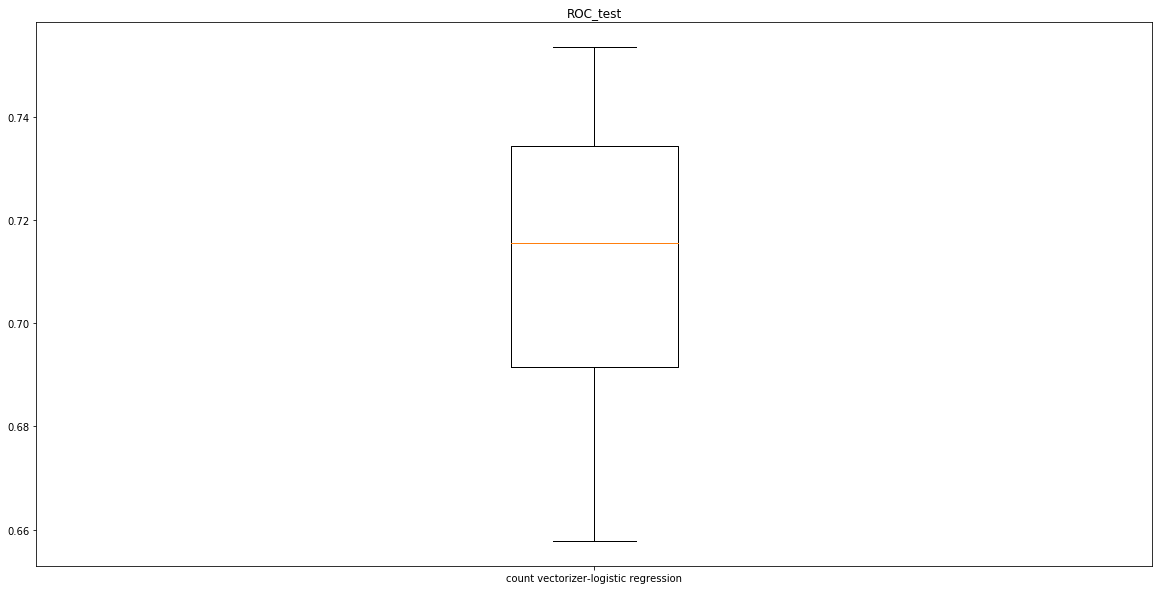

In [97]:
show_metric('ROC_test')

In [34]:
data = df.merge(y,on ='label',how='inner')

In [35]:
data.head()

,label,text,lang,title,2
0,14,convent intern commiss rhine bern convent le g...,fr,environmental_protection,1
1,14,convent intern commiss rhine bern convent le g...,fr,pollution_control_measures,1
2,14,convent intern commiss rhine bern convent le g...,fr,environmental_cooperation,1
3,14,convent intern commiss rhine bern convent le g...,fr,rhine_valley,1
4,14,convent intern commiss rhine bern convent le g...,fr,ec_agreement,1



### Часть II (4 балла) 
Важно не только извлечь данные, но и грамотно их визуализировать.

В этой части требуется визуализировать векторы, полученные с помощью word2vec, и матрицу «слова-темы», полученную с помощью тематического моделирования. 
Выбор инструментов построения модели и визуализации свободный. Требуется, чтобы визуализация была наглядной, давала какую-то информацию о данных и была, по возможности, красивой. Рекомендуется смотреть в сторону t-SNE и биб- лиотек визуализации графов и тематических моделей (самый простой вариант — LDAvis). Пример визуализации матрицы «слова-темы» можно найти здесь. Визуали- зации должны быть представлены в отчёте в ipython-ноутбук вместе с подробным описанием того, как они были получены и какие выводы были сделаны на их осно- вании.

# Говно Говно Говно Говно Говно Говно Говно Говно

In [138]:
a = LineSentence(clean_corpus)

In [141]:
model = Word2Vec(clean_corpus, size=100, window=5, min_count=5, workers=4)

In [ ]:
1

In [128]:
%%time
vect_w2v_tf_idf = TfidfEmbeddingVectorizer(max_features = MAX_FEATURES)
vect_w2v_tf_idf.fit(df['text'])

TypeError: __init__() missing 1 required positional argument: 'word2vec'

In [116]:
t.head()

,label,text,lang,title,2
0,14,"""convent intern commiss rhine bern convent le...",fr,environmental_protection,1
1,14,"""convent intern commiss rhine bern convent le...",fr,pollution_control_measures,1
2,14,"""convent intern commiss rhine bern convent le...",fr,environmental_cooperation,1
3,14,"""convent intern commiss rhine bern convent le...",fr,rhine_valley,1
4,14,"""convent intern commiss rhine bern convent le...",fr,ec_agreement,1


In [118]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
p = Pipeline([('vect', vect_count),
              ('logreg', LogisticRegression())
              ])
p.fit(df['text'], y=t['label'])

ValueError: Found input variables with inconsistent numbers of samples: [19348, 102741]